In [ ]:
!pip install fbprophet

# 1. Import Dependencies

In [1]:
import pandas as pd # Import pandas
from fbprophet import Prophet # Prophet modelling library

Importing plotly failed. Interactive plots will not work.


# 2. Load Data

In [48]:
df = pd.read_csv('dataset.csv')

In [49]:
df.head()

,Date,Store/Product,Value
0,20180101,LOS_ANGELES-TESLA_MODEL_X,2926.000
1,20180102,LOS_ANGELES-TESLA_MODEL_X,2687.531
2,20180103,LOS_ANGELES-TESLA_MODEL_X,2793.000
3,20180104,LOS_ANGELES-TESLA_MODEL_X,2394.000
4,20180105,LOS_ANGELES-TESLA_MODEL_X,2660.000


In [50]:
df.dtypes

Date               int64
Store/Product     object
Value            float64
dtype: object

# 3. Apply Data Preprocessing

In [53]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [54]:
frame = df[df['Store/Product'] == 'LOS_ANGELES-TESLA_MODEL_X'].copy()

In [55]:
frame.drop('Store/Product', axis=1, inplace=True)

In [56]:
frame.columns = ['ds', 'y']

In [57]:
frame.head()

,ds,y
0,2018-01-01,2926.000
1,2018-01-02,2687.531
2,2018-01-03,2793.000
3,2018-01-04,2394.000
4,2018-01-05,2660.000


# 4. Create Time Series Model

In [62]:
m = Prophet(interval_width=0.95) 

In [63]:
training_run = m.fit(frame)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# 5. Evaluate Model

In [64]:
future = m.make_future_dataframe(periods=400, freq='D')

In [65]:
forecast = m.predict(future)

In [66]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3510.158165,789.071938,4048.972038,3510.158165,3510.158165,-1111.274728,-1111.274728,-1111.274728,16.630785,16.630785,16.630785,-1127.905513,-1127.905513,-1127.905513,0.0,0.0,0.0,2398.883437
1,2018-01-02,3510.918895,813.221041,3992.322826,3510.918895,3510.918895,-1121.474840,-1121.474840,-1121.474840,-11.278673,-11.278673,-11.278673,-1110.196167,-1110.196167,-1110.196167,0.0,0.0,0.0,2389.444055
2,2018-01-03,3511.679625,793.862348,4051.714531,3511.679625,3511.679625,-1095.700053,-1095.700053,-1095.700053,-4.415302,-4.415302,-4.415302,-1091.284751,-1091.284751,-1091.284751,0.0,0.0,0.0,2415.979572
3,2018-01-04,3512.440355,971.286587,4084.057155,3512.440355,3512.440355,-1048.748598,-1048.748598,-1048.748598,22.499269,22.499269,22.499269,-1071.247867,-1071.247867,-1071.247867,0.0,0.0,0.0,2463.691757
4,2018-01-05,3513.201085,823.679910,4089.460181,3513.201085,3513.201085,-1084.784956,-1084.784956,-1084.784956,-34.569798,-34.569798,-34.569798,-1050.215158,-1050.215158,-1050.215158,0.0,0.0,0.0,2428.416129


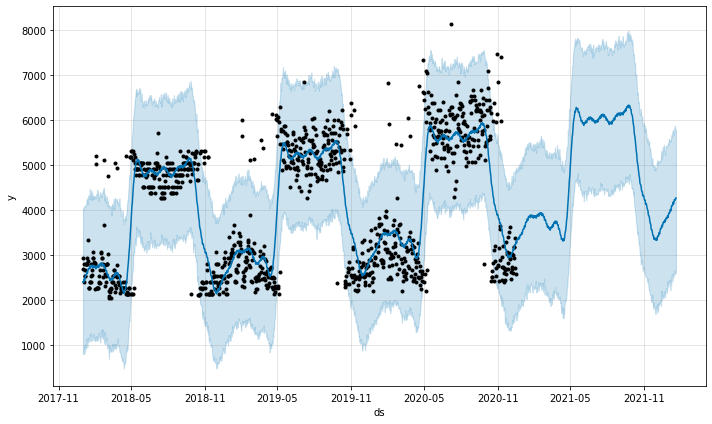

In [67]:
plot1 = m.plot(forecast)

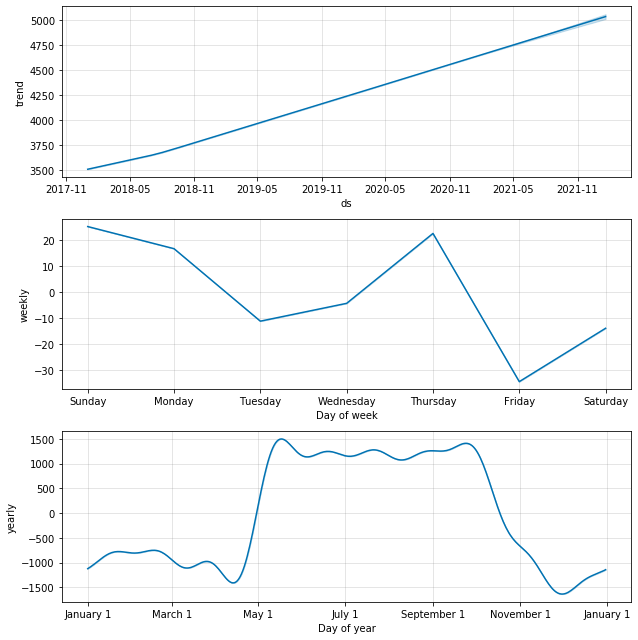

In [68]:
plot2 = m.plot_components(forecast)

# BONUS ROUND - Scaling Up

In [42]:
lines = df['Store/Product'].unique()

In [49]:
lines = lines[:2]

In [46]:
for stock_line in lines: 
    frame = df[df['Store/Product'] == stock_line].copy()
    print(frame.tail())

           Date              Store/Product        Value
1075 2020-12-12  LOS_ANGELES-TESLA_MODEL_X  3167.594500
1076 2020-12-13  LOS_ANGELES-TESLA_MODEL_X  3167.594500
1077 2020-12-14  LOS_ANGELES-TESLA_MODEL_X  3383.354511
1078 2020-12-15  LOS_ANGELES-TESLA_MODEL_X  2714.591329
1079 2020-12-16  LOS_ANGELES-TESLA_MODEL_X  2585.035107
           Date              Store/Product        Value
3235 2020-12-12  LOS_ANGELES-TESLA_MODEL_S  2899.835050
3236 2020-12-13  LOS_ANGELES-TESLA_MODEL_S  2896.835050
3237 2020-12-14  LOS_ANGELES-TESLA_MODEL_S  3094.019060
3238 2020-12-15  LOS_ANGELES-TESLA_MODEL_S  2492.132196
3239 2020-12-16  LOS_ANGELES-TESLA_MODEL_S  2374.531596
           Date                Store/Product   Value
2160 2018-01-01  SAN_FRANCISCO-TESLA_MODEL_S  2679.4


In [51]:
lines

array(['LOS_ANGELES-TESLA_MODEL_X', 'LOS_ANGELES-TESLA_MODEL_S'],
      dtype=object)

In [52]:
fit_models = {}
for stock_line in lines: 
    frame = df[df['Store/Product'] == stock_line].copy()
    frame.drop('Store/Product', axis=1, inplace=True)
    frame.columns = ['ds', 'y']
    
    m = Prophet(interval_width=0.95)
    model = m.fit(frame)
    
    fit_models[stock_line] = m 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
fit_models

{'LOS_ANGELES-TESLA_MODEL_X': <fbprophet.forecaster.Prophet at 0x7fd60ae87250>,
 'LOS_ANGELES-TESLA_MODEL_S': <fbprophet.forecaster.Prophet at 0x7fd608b0ecd0>}

In [58]:
forward = fit_models['LOS_ANGELES-TESLA_MODEL_S'].make_future_dataframe(200)
forecast = fit_models['LOS_ANGELES-TESLA_MODEL_S'].predict(forward)

In [59]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3547.537494,249.830690,5326.788741,3547.537494,3547.537494,-678.565715,-678.565715,-678.565715,-16.101352,-16.101352,-16.101352,-662.464363,-662.464363,-662.464363,0.0,0.0,0.0,2868.971778
1,2018-01-02,3548.368250,337.154843,5607.494879,3548.368250,3548.368250,-646.635337,-646.635337,-646.635337,-24.636959,-24.636959,-24.636959,-621.998379,-621.998379,-621.998379,0.0,0.0,0.0,2901.732912
2,2018-01-03,3549.199006,414.574502,5300.766036,3549.199006,3549.199006,-623.022718,-623.022718,-623.022718,-45.283964,-45.283964,-45.283964,-577.738754,-577.738754,-577.738754,0.0,0.0,0.0,2926.176288
3,2018-01-04,3550.029762,339.657542,5499.996893,3550.029762,3550.029762,-463.030595,-463.030595,-463.030595,67.518571,67.518571,67.518571,-530.549166,-530.549166,-530.549166,0.0,0.0,0.0,3086.999168
4,2018-01-05,3550.860519,644.297265,5529.840105,3550.860519,3550.860519,-478.924914,-478.924914,-478.924914,2.484076,2.484076,2.484076,-481.408991,-481.408991,-481.408991,0.0,0.0,0.0,3071.935604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2021-06-30,4856.392002,3043.383702,8002.344456,4849.648045,4863.021740,602.688514,602.688514,602.688514,-45.283964,-45.283964,-45.283964,647.972479,647.972479,647.972479,0.0,0.0,0.0,5459.080516
1276,2021-07-01,4857.473038,2991.616803,7931.186026,4850.720827,4864.170229,716.820503,716.820503,716.820503,67.518571,67.518571,67.518571,649.301932,649.301932,649.301932,0.0,0.0,0.0,5574.293541
1277,2021-07-02,4858.554073,3038.998617,8155.557922,4851.790037,4865.320614,653.390834,653.390834,653.390834,2.484076,2.484076,2.484076,650.906758,650.906758,650.906758,0.0,0.0,0.0,5511.944908
1278,2021-07-03,4859.635109,3095.826574,8148.834092,4852.811251,4866.476153,677.112809,677.112809,677.112809,24.308522,24.308522,24.308522,652.804287,652.804287,652.804287,0.0,0.0,0.0,5536.747918
